# AUTOMATED ESSAY GRADING SYSTEM

### This system is able to extract the essays from images and evaluate them

This project makes use of NLP processing techniques, LSTM, GloVe embeddings and EasyOCR

#### By: 
9232 Omkar Satupe

9237 Ryan Valiaparambil

9423 Mahek Intwala

# Importing the data

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
DATASET_DIR = "./dataset/"
SAVE_DIR = './'

In [3]:
X = pd.read_csv(os.path.join(DATASET_DIR, 'training_set_rel3.tsv'), sep='\t', encoding='ISO-8859-1')
y = X['domain1_score']
X = X.dropna(axis=1)
X = X.drop(columns=['rater1_domain1', 'rater2_domain1'])

X.head()

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8


# Preprocessing Measures

In [4]:
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec

def essay_to_wordlist(essay_v, remove_stopwords):
    """Remove the tagged labels and word tokenize the sentence."""
    essay_v = re.sub("[^a-zA-Z]", " ", essay_v)
    words = essay_v.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    return (words)

def essay_to_sentences(essay_v, remove_stopwords):
    """Sentence tokenize the essay and call essay_to_wordlist() for word tokenization."""
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(essay_v.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(essay_to_wordlist(raw_sentence, remove_stopwords))
    return sentences

def makeFeatureVec(words, model, num_features):
    """Make Feature Vector from the words list of an Essay."""
    featureVec = np.zeros((num_features,),dtype="float32")
    num_words = 0.
    # index2word_set = set(model.wv.index2word)
    for word in words:
        if word in model:
            num_words += 1
            featureVec = np.add(featureVec, model[word])       
    featureVec = np.divide(featureVec,num_words)
    return featureVec

def getAvgFeatureVecs(essays, model, num_features):
    """Main function to generate the word vectors for word2vec model."""
    counter = 0
    essayFeatureVecs = np.zeros((len(essays),num_features),dtype="float32")
    for essay in essays:
        essayFeatureVecs[counter] = makeFeatureVec(essay, model, num_features)
        counter = counter + 1
    return essayFeatureVecs

# Defining the Model

In [5]:
corpus = []
for essay in X['essay']:
    corpus.append(essay_to_wordlist(essay, True))

embedding_dict={}

with open('./glove.6B/glove.6B.200d.txt','r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:],'float32')
        embedding_dict[word] = vectors

# Loading the Model

In [6]:
from keras.models import load_model

newmodel = load_model('./final_lstm_model200.h5')
model = embedding_dict

# Predict the Essay

In [52]:
import math
from gensim.test.utils import datapath

contentBad = """
Artificial Intelligence (AI) is like, totally amazing, you guys! It's like, everywhere now, and it's, like, changing how stuff works. So, like, let's talk about what AI is and what it's doing, and, you know, stuff.

AI is all about making computers do stuff that only, like, people used to do. It's like when you ask Siri to, like, tell you a joke or something. That's AI, being all funny and stuff. But AI can also do, like, super important things, not just jokes. It can, like, help doctors figure out what's wrong with you and, like, trade stocks without, you know, people doing it. So, AI is, like, pretty big in healthcare and finance and stuff.

One cool thing about AI is that it, like, talks to you. Have you ever, like, chatted with a robot online? That's AI, just, like, talking to you and answering your questions. And, like, in customer service, you might, like, talk to a chatbot when you have a problem with, like, a product or service. It's like having a robot friend help you out, which is kind of cool.

But AI isn't, like, perfect. There are some, you know, problems with it. Some people worry about, like, robots taking over the world and stuff. And, like, there are concerns about privacy because AI, like, collects lots of data about you. So, that's, like, something to think about.

And, you know, AI can be, like, expensive. It costs a lot of money to, like, make AI do cool stuff. Plus, you need, like, really smart people who know how to, you know, make AI work. So, not every business can, like, use AI.

If you want to use AI in your business, you need, like, a plan. You should, like, collect lots of data and, you know, make sure it's good data. And you should, like, try new things and, you know, learn from your mistakes. And you should, like, talk to the tech people and the business people, so everyone, like, works together.

So, in a nutshell, AI is, like, totally changing the world. It's doing cool things in healthcare and finance, and it's, like, talking to you and helping you out. But there are, like, concerns about robots taking over and stuff. And it can be, you know, expensive. So, if you want to use AI, just have a plan and, like, work together with everyone. It's, like, pretty simple, right?
""" 

contentGood = """
In the age of rapid technological advancements, no other innovation has permeated the business world as profoundly as Artificial Intelligence (AI). This revolutionary technology has transformed not only how businesses operate but also how they engage with customers and make critical decisions. This essay delves into the multifaceted role of AI in modern business, exploring its applications, challenges, and the strategies employed by organizations to harness its potential.

Artificial Intelligence, in its essence, refers to the development of computer systems capable of performing tasks that typically require human intelligence. These tasks encompass a broad spectrum, from natural language processing and image recognition to data analysis and decision-making. As such, AI has been embraced across various industries, reshaping their landscapes. In healthcare, AI assists in diagnostics and treatment recommendations, enabling faster, more accurate patient care. In finance, AI-driven algorithms automate trading decisions and detect fraudulent activities. Manufacturing processes benefit from predictive maintenance, reducing costly downtime.

The role of AI in customer engagement is particularly notable. Chatbots and virtual assistants powered by AI provide instant customer support, enhancing the overall experience. Additionally, AI algorithms analyze customer data to tailor personalized recommendations, fostering customer loyalty and increasing sales. For instance, e-commerce giants employ AI to suggest products based on browsing and purchase history, resulting in higher conversion rates.

Despite its myriad advantages, AI implementation is not without challenges. Ethical concerns loom large, especially in areas like autonomous weaponry and surveillance. Moreover, the data-driven nature of AI raises questions about privacy and data security. Organizations must navigate these concerns while ensuring they comply with stringent regulations and standards. Additionally, the high cost of AI technology and the need for specialized talent can be barriers to entry for some businesses.

To harness the potential of AI, organizations must adopt a strategic approach. One key element is data collection and management. AI algorithms rely on vast datasets for training, and organizations must invest in data infrastructure and quality. Furthermore, business leaders must cultivate a culture of innovation, where experimentation and learning from AI failures are encouraged. Successful AI implementation also demands collaboration between technical and business teams, with clear communication and shared goals.

In conclusion, Artificial Intelligence is a transformative force in the modern business landscape. Its applications are diverse, from healthcare and finance to customer engagement. However, it is not without challenges, including ethical concerns and data privacy issues. To reap the benefits of AI, organizations must strategically invest in data, foster innovation, and promote collaboration.
"""

In [53]:
content = contentGood

if len(content) > 20:
    num_features = 200
    clean_test_essays = []
    clean_test_essays.append(essay_to_wordlist( content, remove_stopwords=True ))
    testDataVecs = getAvgFeatureVecs( clean_test_essays, model, num_features )
    testDataVecs = np.array(testDataVecs)
    testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))

    preds = newmodel.predict(testDataVecs)

    if math.isnan(preds):
        preds = 0
    else:
        preds = np.round(preds)

    if preds < 0:
        preds = 0
else:
    preds = 0

print(preds)

1/1 [==============================] - 0s 33ms/step
[[13.]]


In [51]:
content = contentBad

if len(content) > 20:
    num_features = 200
    clean_test_essays = []
    clean_test_essays.append(essay_to_wordlist( content, remove_stopwords=True ))
    testDataVecs = getAvgFeatureVecs( clean_test_essays, model, num_features )
    testDataVecs = np.array(testDataVecs)
    testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))

    preds = newmodel.predict(testDataVecs)

    if math.isnan(preds):
        preds = 0
    else:
        preds = np.round(preds)

    if preds < 0:
        preds = 0
else:
    preds = 0

print(preds)

1/1 [==============================] - 0s 32ms/step
[[9.]]


# Predicting Score from Essay Image

In [80]:
import os
import easyocr
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [81]:
image_dir = "./essays"

image_extensions = {".jpg", ".jpeg", ".png"}

In [82]:
image_list = []

for filename in os.listdir(image_dir):
    if any(filename.endswith(ext) for ext in image_extensions):
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)
        image_list.append(image)

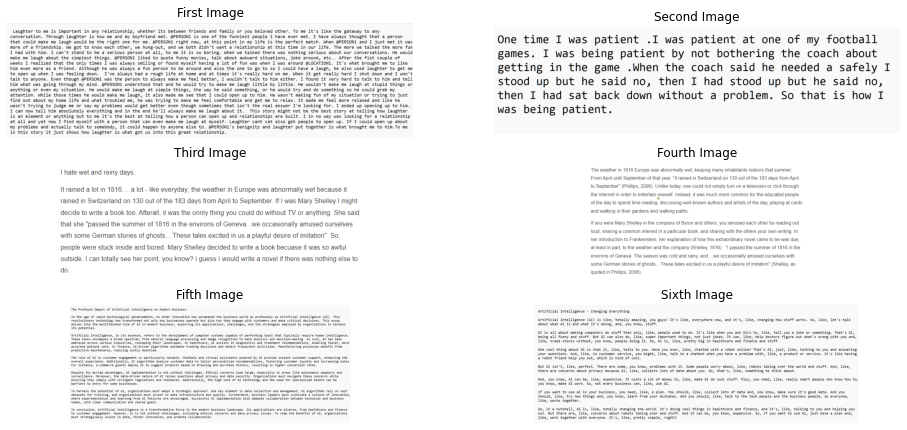

In [83]:
fig = plt.figure(figsize=(16,10))
rows = 4
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(image_list[0])
plt.axis('off')
plt.title("First Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(image_list[1])
plt.axis('off')
plt.title("Second Image")

fig.add_subplot(rows, columns, 3)
plt.imshow(image_list[2])
plt.axis('off')
plt.title("Third Image")

fig.add_subplot(rows, columns, 4)
plt.imshow(image_list[3])
plt.axis('off')
plt.title("Fourth Image");

fig.add_subplot(rows, columns, 5)
plt.imshow(image_list[4])
plt.axis('off')
plt.title("Fifth Image")

fig.add_subplot(rows, columns, 6)
plt.imshow(image_list[5])
plt.axis('off')
plt.title("Sixth Image");

In [84]:
text_reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [85]:
output=[]

for im in image_list:
    print("---------------------------")
    t = []
    results = text_reader.readtext(im)
    for (bbox, text, prob) in results:
        print(text)
        t.append(text)
    output.append(t)

---------------------------
Laughter
to
me
is important
in
any relationship,
whether
its
between
friends
and family
or
you beloved
other
To
me
it's
like
the gateway
to
any
conversation. Through laughter
is
how me
and
my
boyfriend
met.
@PERSONI
is
one
Of
the funniest people
have
ever
met
have
lways thought
that
person
that
could
make
me
laugh would
be
the right
one
for
me
@PERSONI
right
now,
at
this point
in
my
life
is
the perfect
match.
When @PERSONI
and
just
met
it
was
more
of
friendship.
We
to
know each other ,
we hung-out,
and
We
both didn't
want
relationship
at this
time
in
our life
The
more
We
talked
the
more
fun
had with
him.
can't
stand
to
be
serious person
at
to
me
it
is
So
boring.
When
We
talked
there
Was
nothing serious
about
our
conversations_
He
would
make
me laugh
about
the simplest things _
@PERSONI
liked
to quote funny movies,
talk
about awkward situations,
joke around,
etc_
After
the
fist couple
Of
weeks
realized
that
the
only
times
was always smiling
or
found myself ha

Artificial Intelligence
Changing Everything
Artificial
Intelligence
(AI)
is like, totally amazing,
you guys!
It
like, everywhere
and
it
like,
changing
how
stuff works _
like,
let
talk
about
what
AI
is
and
what
it
doing,
and,
you know,
stuff_
AI
is
all
about making computers
do stuff that only, like,
people
used
to
do_
It
like
when
you
ask Siri
like,
tell
you
joke
or
something_
That
being all funny
and
stuff
But
AI
can
also
like,
super
important
things_
not just jokes
It
can, like,
help
doctors
figure
out
what
wrong with
you
and_
like,
trade
stocks without,
you know, people doing
it. So,
AI is, like,
pretty
big
in
healthcare
and
finance
and
stuff 
One
cool thing about
AI
is
that
it, like,
talks
to you.
Have you
ever, like,
chatted
with
robot
online?
That' s
just, like,
talking to you
and answering
your questions
And, like,
in
customer
service,
you might, like,
talk to
chatbot
when
you have
problem with, like,
product
or
service_
It
like
having
robot
friend
help you
out,
which
is
kind
of

In [86]:
extracted_essay = [' '.join(sublist) for sublist in output]

In [90]:
extracted_essay

["Laughter to me is important in any relationship, whether its between friends and family or you beloved other To me it's like the gateway to any conversation. Through laughter is how me and my boyfriend met. @PERSONI is one Of the funniest people have ever met have lways thought that person that could make me laugh would be the right one for me @PERSONI right now, at this point in my life is the perfect match. When @PERSONI and just met it was more of friendship. We to know each other , we hung-out, and We both didn't want relationship at this time in our life The more We talked the more fun had with him. can't stand to be serious person at to me it is So boring. When We talked there Was nothing serious about our conversations_ He would make me laugh about the simplest things _ @PERSONI liked to quote funny movies, talk about awkward situations, joke around, etc_ After the fist couple Of weeks realized that the only times was always smiling or found myself having lot of fun was when w

In [91]:
for content in extracted_essay:

    if len(content) > 20:
        num_features = 200
        clean_test_essays = []
        clean_test_essays.append(essay_to_wordlist( content, remove_stopwords=True ))
        testDataVecs = getAvgFeatureVecs( clean_test_essays, model, num_features )
        testDataVecs = np.array(testDataVecs)
        testDataVecs = np.reshape(testDataVecs, (testDataVecs.shape[0], 1, testDataVecs.shape[1]))

        preds = newmodel.predict(testDataVecs)

        if math.isnan(preds):
            preds = 0
        else:
            preds = np.round(preds)

        if preds < 0:
            preds = 0
    else:
        preds = 0

    print("Score of Extracted Essay = ", preds)

1/1 [==============================] - 0s 36ms/step
Score of Extracted Essay =  [[62.]]
1/1 [==============================] - 0s 33ms/step
Score of Extracted Essay =  [[24.]]
1/1 [==============================] - 0s 33ms/step
Score of Extracted Essay =  [[1.]]
1/1 [==============================] - 0s 41ms/step
Score of Extracted Essay =  [[5.]]
1/1 [==============================] - 0s 41ms/step
Score of Extracted Essay =  [[12.]]
1/1 [==============================] - 0s 33ms/step
Score of Extracted Essay =  [[9.]]
